<a href="https://colab.research.google.com/github/Kandeo/Customer-Attrition-Prediction/blob/main/Christine_Kandeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD CUSTOMER ATTRITION PREDICTION**

**OVERVIEW** 

Customer attrition is defined as the loss of customers by a business. It is one of the most important concerns to any business with customers as it has a negative impact on the company's revenue. 

This research therefore aims to analyze factors that increase customer churning and develop a churn prediction model that assists the business  to predict customers who are most likely to churn.

Other objectives include:
- Understanding the influence a customer's demographic Information has on attrition.
- Analyzing the relationship between customer churn and credit card limit.
- Analyzing the influence the number of times a customer has contacted the company has to attrition.
- Determining features that have the highest impact on customer attrition.
- Finding whether the number of months on book affects churning rate.
- Analyzing the effect a customer's card category has on churning.
- The effect a customer being inactive has on churning.
- Understanding the relationship transaction amount has with attrition.



Dataset: [Credit Card Customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers)


# **DEFINING THE QUESTION**

**Specific Data Analytics Question**

Understanding the characterisitcs of users that are likely to churn and using that knowledge to build a model capable of predicting whether a customer churns the Credit Card Service.

**Metrics for success**

Success shall be measured based on the algorithm that effectively predicts churn with an accuracy of at least 85% .

Since we aim to identify customers likely to churn, the Recall and Precison scores shall also be evaluated being that a churned problem is likely to be imbalanced.



**Understanding the Context**

Business managers on the credit card line of  business in consumer banking are always facing the problem of customer attrition. The full cost of attrition includes both lost revenue and the marketing costs involved with replacing those customers with new ones.

Besides loss of revenue, the costs of initially acquiring that customer may not have already been covered by the customer’s spending to date. Furthermore, it is always more difficult and expensive to acquire a new customer than it is to retain a current paying customer.

There could be several [Reasons](https://vhtcx.com/blog/customers-say-goodbye-5-factors-result-customer-churn/) for customer attrition. Leveraging the most significant of these factors, a business can understand the likelihood of attrition for each account to prevent loss.



**Experimental Design**

1. Data Preparation
 - Loading Dependencies
 - Loading the Dataset
 - Dealing with Irrelevant Observations
 - Handling missing/duplicate values
 - Data Uniformity
 - Checking Outliers
3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis
4. Modelling
 - Feature Engineering
 - Instantiating the Classifiers
 - Performance evaluation
 - Hyperparameter optimization
5. Performance Analysis
 - Assessing scores
6. Conclusions and Recommendations
 

**Data Relevance**

- **CLIENTNUM** ~ Unique Customer ID
- **Attrition Flag** ~ 0= Existing Customer, 1= Attrited Customer 
- **Customer Age** ~ Age of the Customer
- **Gender** ~ M= Male, F= Female
- **Dependent Count** ~ Number of Family members dependent on the customer
- **Education Level** ~ Education level of the Customer
- **Marital Status** ~ Marital Status of the Customer
- **Income Category** ~ Income category to which the Customer belongs
- **Card Category** ~ Category of Card used by the Customer
- **Months on Book** ~ Number of months for which the Customer has been on the books of the bank in the past 12 months
- **Total Relationship Count** ~ Total relationships or Accounts the Customer has with the bank
- **Months Inactive 12 mon** ~ Number of months in which the Customer has not carried out any transactions using the Card
- **Contacts Count 12 mon** ~ Number of times the Customer has contacted the Company in the past 12 months
- **Credit Limit** ~ Credit Limit the Customer has kept for the Card
- **Total Revolving Balance** ~ The unpaid portion that carries over to the next month when a customer does not pay
- **Average_Utilization_Ratio** ~ Average Card Utilization Ratio.


# **DATA PREPARATION**

Loading dependencies

In [ ]:
#Importing libraries:

#1. Data Wrangling/Manipulation:
import pandas as pd 
import numpy as np 

#2. Data Visualization:
import seaborn as sns   
import matplotlib.pyplot as plt

#3. Data Processing:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

#4. Modelling:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

#5. Model Evaluation:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

#6. Removing Warnings:
import warnings
warnings.filterwarnings("ignore")


Loading the Dataset

In [ ]:
#Loading the data from the csv to Pandas dataframe:
Credit = pd.read_csv('/content/BankChurners.csv')

#Printing the first 4 rows of the dataframe:
Credit.head(4)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987


In [ ]:
#Checking the number of rows and columns:
Credit.shape


(10127, 23)

Irrelevant Observations

In [ ]:
#Dropping the first and last 2 columns as indicated in the data description:
Credit.drop(Credit.columns[[0, 21, 22]], axis=1, inplace = True)
Credit.head(4)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


Missing Values

In [ ]:
#Checking for null entries in each column:
Credit.isnull().sum().sort_values()


Attrition_Flag              0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Months_Inactive_12_mon      0
Total_Relationship_Count    0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Duplicate Values

In [ ]:
#Checking for duplicates:
Credit.duplicated().sum()    


0

The dataset lacks any missing or duplicated values

Data Uniformity

In [ ]:
#Checking for unique entries in the Categorical columns:
{column: list(Credit[column].unique()) 
for column in Credit.select_dtypes('object').columns}


{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Gender': ['M', 'F'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced']}

- Attrition Flag and Gender have 2 unique values hence binary.

- Education Level and Income Catergory are ordinal columns. They both have clear ordering.

- Marital Status on the other hand is nominal. No Intrinsic ordering is needed on the categories.


Dealing with the Unknown Categories on the Education Level, Income category and Marital status Columns:

In [ ]:
#Replacing the unknowns on the 3 columns with none:
Credit.replace('Unknown', np.nan, inplace = True)


In [ ]:
#Checking for the total number of missing values:
Credit.isnull().sum().sort_values(ascending = False).head(5)


Education_Level          1519
Income_Category          1112
Marital_Status            749
Avg_Utilization_Ratio       0
Total_Ct_Chng_Q4_Q1         0
dtype: int64

Handling the Missing Values

In [ ]:
#Creating a dataframe with the columns:
Missing = Credit[['Education_Level','Income_Category', 'Marital_Status']].copy()

#Checking the Modes:
Credit['Education_Level'].mode()

#The modes for the 3 are Graduate, Less than $40K and Married respectively,

#Replacing the Missing values with the respective Modes:'
for i in Missing:
  Credit[i] = Credit[i].fillna(Credit[i].mode()[0])
  

Checking Outliers

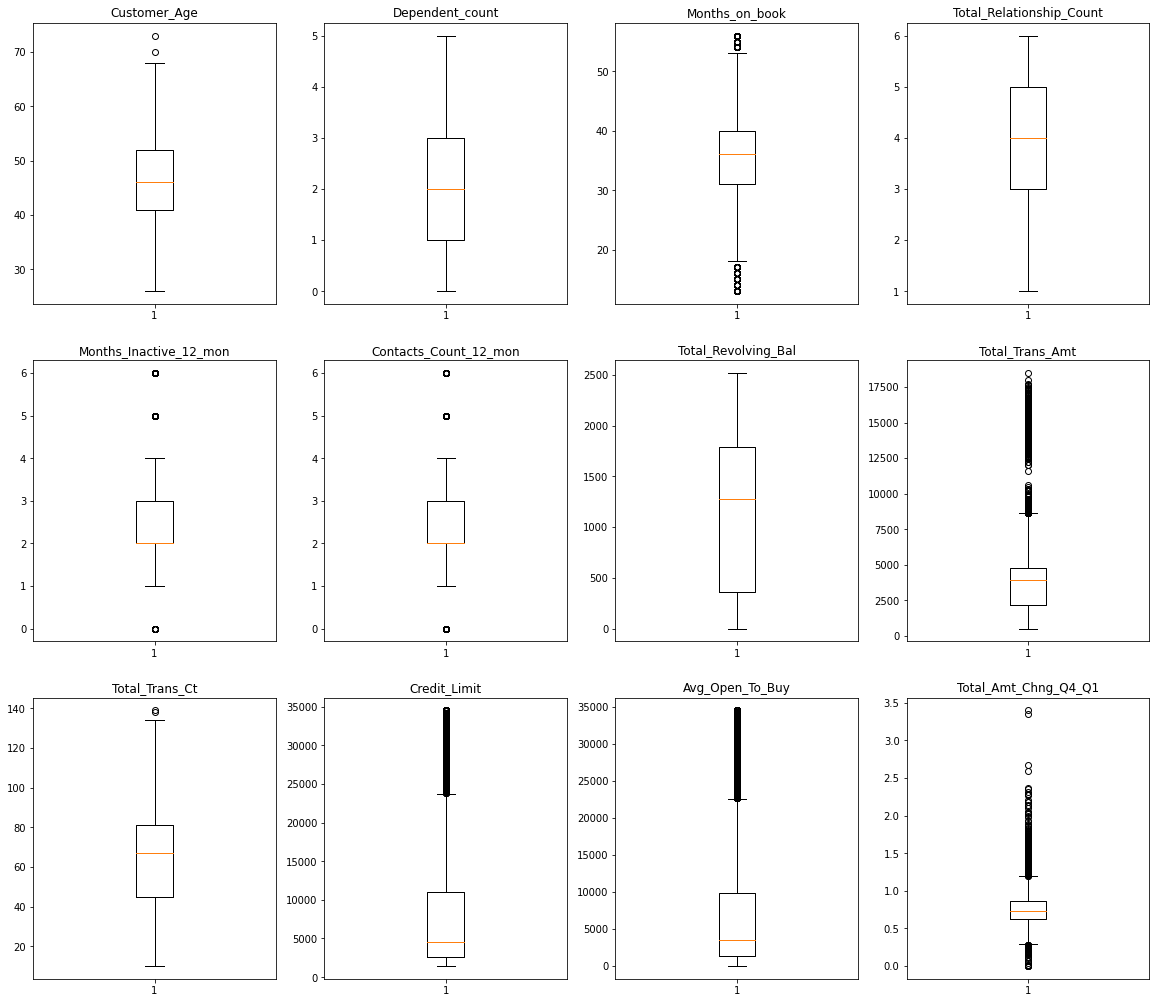

In [ ]:
# Checking for Outliers on the numerical features:
# Creating a dictionary:

Numerics = {'Customer_Age': 1, 'Dependent_count': 2, 'Months_on_book': 3,'Total_Relationship_Count': 4,
              'Months_Inactive_12_mon': 5, 'Contacts_Count_12_mon': 6, 'Total_Revolving_Bal': 7,
              'Total_Trans_Amt': 8, 'Total_Trans_Ct': 9, 'Credit_Limit': 10, 'Avg_Open_To_Buy': 11, 'Total_Amt_Chng_Q4_Q1': 12 }

plt.figure(figsize=(20,30))

#Visualizing the Information on a boxplot:
for variable,i in Numerics.items():
  plt.subplot(5,4,i)
  plt.boxplot(Credit[variable])
  plt.title(variable)
plt.show()


Most of the Product Variables have existing Outliers.
 
Since there's no basis to assume the entries are not valid observations, no outliers are dropped.

# **EXPLORATORY DATA ANALYSIS**

This analysis involves summarizing important characteristics and trends in the data to gain better understanding.

# 1. **Univariate Analysis**

Describing the data in terms of:

 - Total Customer Churn

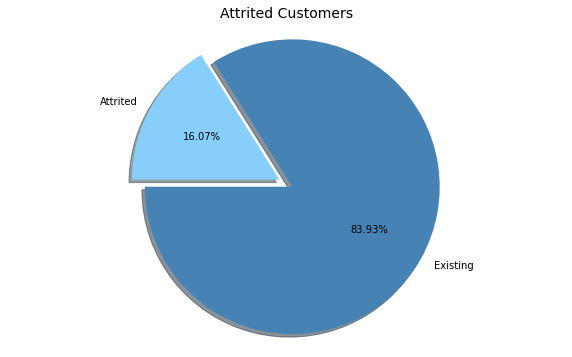

In [ ]:
#Viewing the number of customers that attrited:
Churn = Credit['Attrition_Flag'].value_counts()
Churn
# Existing Customers: 8500    Attrited/Lost Customer:  1627

#Visualizing the information on a pie chart:
labels= ['Existing','Attrited']
colors=['steelblue', 'lightskyblue']
fontsize = 14
plt.figure(figsize= (10, 6))
plt.title("Attrited Customers", fontsize = fontsize)
plt.pie(Churn,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()


16% of the customers did not remain active customers.



**Demographic Information**

 - Gender 

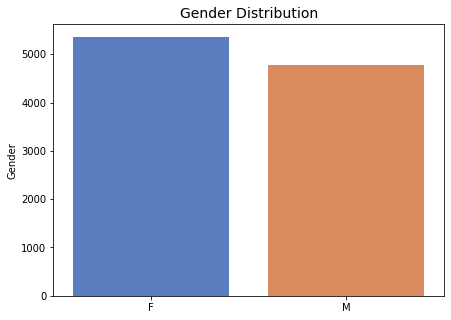

In [ ]:
#To view the customers gender distribution:
Gender = Credit.Gender.value_counts()
Gender
# Males: 4,769 or 47%       Females: 5,358 or 53%

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Gender Distribution", fontsize = fontsize)
sns.barplot(x=Gender.index, y=Gender, palette='muted');


In as much as majority of the customers are females, the distribution is relatively equal there being only around 6% more females than males.

 - Dependant Counts

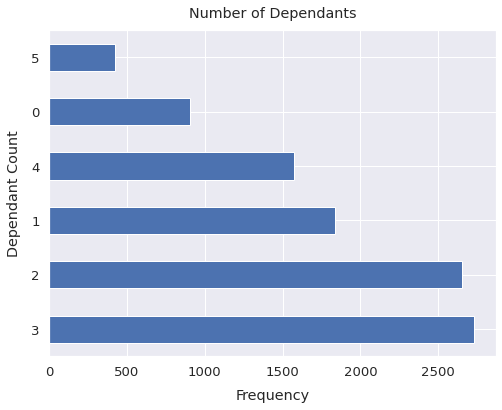

In [ ]:
#Viewing the Number of Family members dependent on the customers:
sns.set(font_scale=1.2)
Credit['Dependent_count'].value_counts().plot(kind='barh', figsize=(8, 6), rot=0)
plt.xlabel("Frequency", labelpad=10)
plt.ylabel("Dependant Count", labelpad=10)
plt.title("Number of Dependants", y=1.02);


Most of the customers had 3 dependants.

 - Education

In [ ]:
#Viewing the data in terms of the Level of education:
Education = Credit.Education_Level.value_counts()
Education


Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Most Customers were graduates


 - Age

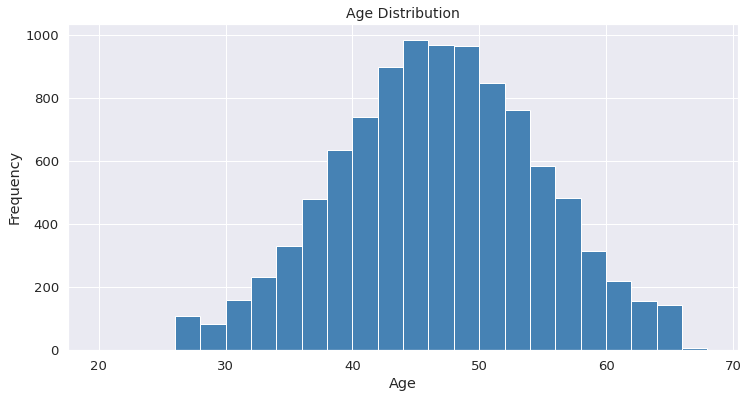

In [ ]:
#Viewing the distribution of Customer Ages:
plt.figure(figsize= (12, 6))
fontsize = 14
plt.title('Age Distribution', fontsize = fontsize)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(Credit.Customer_Age, bins= np.arange(20, 70, 2), color='steelblue', edgecolor='white');


Majority of the customers were aged between 40 to 50 years.


 - Income

In [ ]:
#Viewing the popular Income category of the customers:
Credit['Income_Category'].value_counts(normalize=True)*100


Less than $40K    46.143972
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
$120K +            7.178829
Name: Income_Category, dtype: float64

46% of the customers earned less than $40K.

 - Marital Status

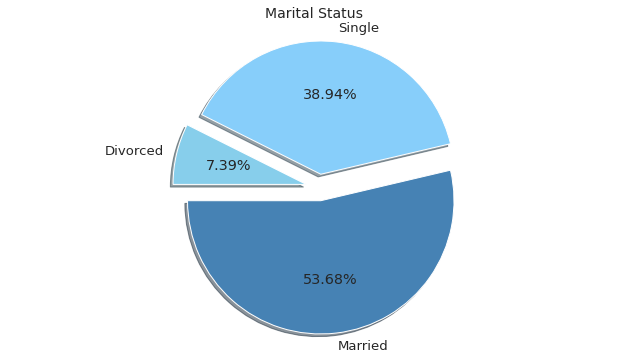

In [ ]:
#Viewing the marital status of the customers:
Marital = Credit['Marital_Status'].value_counts()
Marital
# Married: 5,436    Single: 3,943   Divorced: 748

#Visualizing the information on a pie chart:
labels= ['Married','Single', 'Divorced']
colors=['steelblue', 'lightskyblue', 'skyblue']
fontsize = 14
plt.figure(figsize= (11, 6))
plt.title("Marital Status", fontsize = fontsize)
plt.pie(Marital,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

More than half of the bank customers were married.


**Product Information**

 -  Card Category

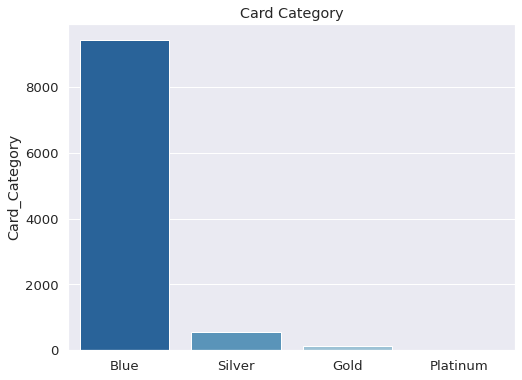

In [ ]:
#To find out the most popular card category:
Card = Credit.Card_Category.value_counts().sort_values(ascending=False).head(5)
Card
#Blue - 9,436    Silver - 555    Gold - 116   Platinum - 20

#Plotting the Information:
plt.figure(figsize= (8,6))
plt.title('Card Category')
sns.barplot(x=Card.index, y=Card, palette='Blues_r');



Most customers used the Blue Credit Card.

While Credit Card hierarchy might be different across institutions, the different colours can give a general idea of the Card’s credit limit and rewards features list.

Being that most of the customers from the data sampled earned less than $40K, Blue can easily be identified as the Standard Card with Silver and Gold being more prestigious.

[Platinum](https://www.canstar.com.au/credit-cards/colour-credit-card-mean/) on the other hand is usually considered the top-tier/most expensive card.



 - Descriptive Summary

In [ ]:
#A Descriptive Summary of the numerical variables:
Credit.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


 - Looking at the information on:
   - **Months on Book**: The minimum and maximum number of months is 13 and 56 respectively. The model created therefore will be good at predicting customers who are at least 1 year 1 month old and not more than 5 years.
   - **Total Relationship Count**:  6 is the highest number of Accounts a Customer had with the bank and 1 the lowest. Further analysis can be done to establish if any relationship exists between total number of accounts and Churning.
   - **Months Inactive**: The least Number of months a Customer stayed without carrying out any transaction with the card was 0 while the most was 6. Exploring to be done on whether the more inactive a customer stays the likely they are to churn.
   - **Contacts Count**: 6 is the most Number of times a Customer had contacted the Company in the past 12 months. The more the contact, the more they are likely to churn since it could be a case of Customer disatisfaction.


In [ ]:
Education = Credit.Contacts_Count_12_mon	.value_counts()
Education

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

# 2. **Bivariate Analysis**

This analysis aims to determine whether a relationship exists between any two given variables.

 - **Customer Attrition and Demographic Information**

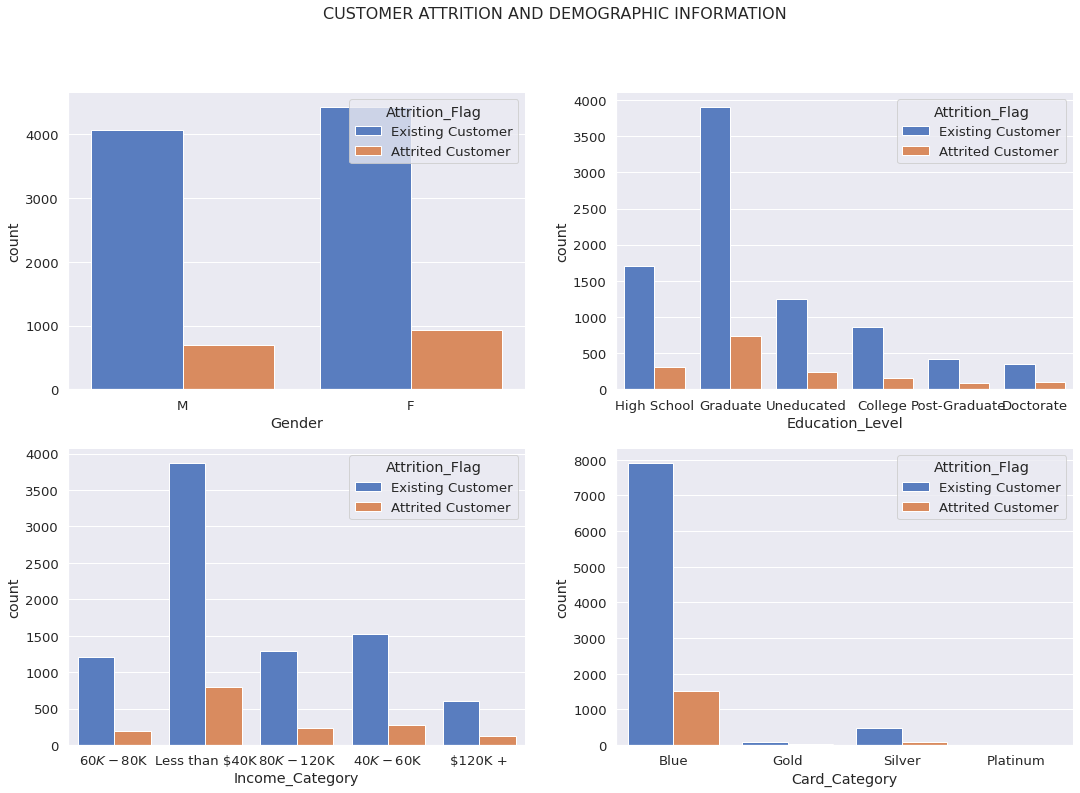

In [ ]:
#Viewing the influence Demographic Information has on Customer Attrition:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
#Indicating the Title:
fig.suptitle('CUSTOMER ATTRITION AND DEMOGRAPHIC INFORMATION', fontsize = 16)
#Plotting the suplots:
sns.countplot(ax=axes[0, 0], data=Credit, x='Gender',hue='Attrition_Flag',palette='muted')
sns.countplot(ax=axes[0, 1], data=Credit, x='Education_Level',hue='Attrition_Flag',palette='muted')
sns.countplot(ax=axes[1, 0], data=Credit, x='Income_Category',hue="Attrition_Flag",palette='muted')
sns.countplot(ax=axes[1, 1], data=Credit, x='Card_Category',hue='Attrition_Flag',palette='muted')
sns.despine()

There appears to be no notable difference on Customer attrition with most of the demographics. 


- **Customer Attrition and Product Information**

Months on Books, Contact Counts, Total Relationship Count and Months Invactive 

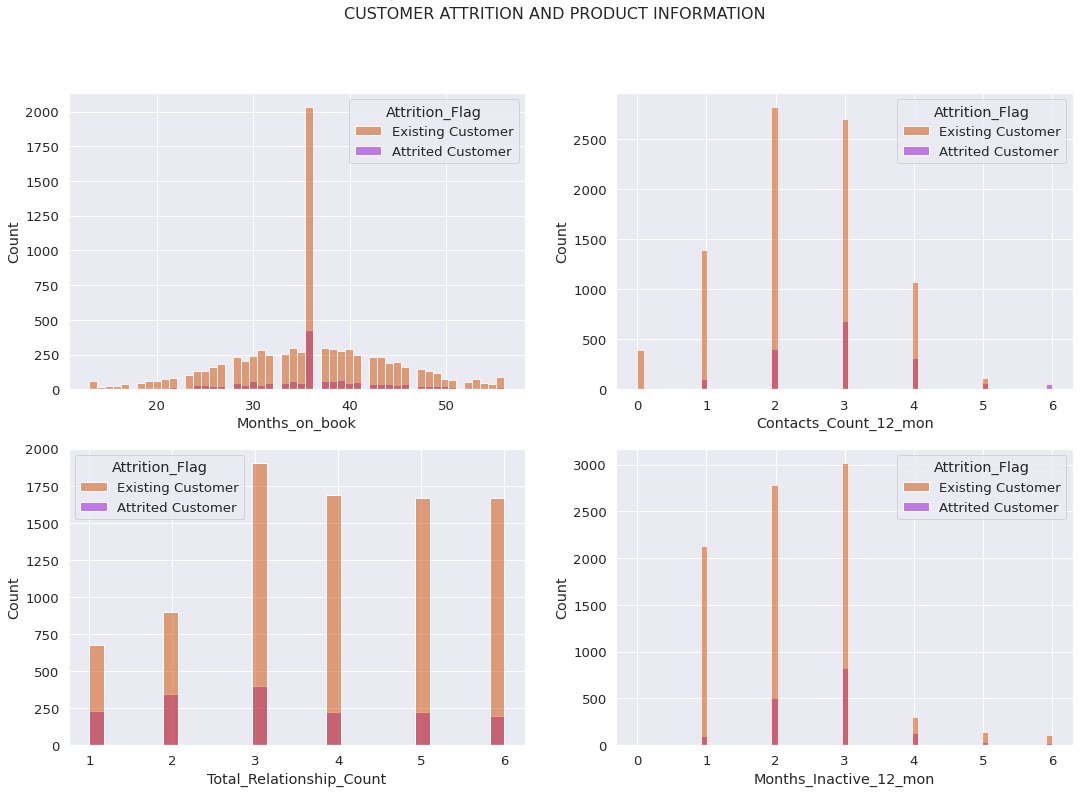

In [ ]:
#Viewing the influence Months on Books, Contacts count, Total Relationship Count and Months Inactive has on Customer Attrition:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('CUSTOMER ATTRITION AND PRODUCT INFORMATION', fontsize = 16)
sns.histplot(ax=axes[0, 0], data =Credit, x='Months_on_book',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 0], data=Credit, x='Total_Relationship_Count',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 1], data=Credit, x='Months_Inactive_12_mon',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 1], data=Credit, x='Contacts_Count_12_mon',hue='Attrition_Flag',palette='gnuplot_r');

 - Observations:
   - **Months on Book**: Customers who have been with the Bank for long are not likely to churn.
   - **Contacts Count**: A customer who contacted the bank 6 times churned. The more the contact, the higher the likelihood.

   - **Total Relationship Count**:  Customers who hold more Accounts/Products with the bank are not likely to churn. 
   
   - **Months Inactive**: most of the active members (less than 3 months) can be found within the non churning customers.
   

Credit Limit, Total Revolving Balance, Total Trans Ct, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1 and Avg_Utilization_Ratio:

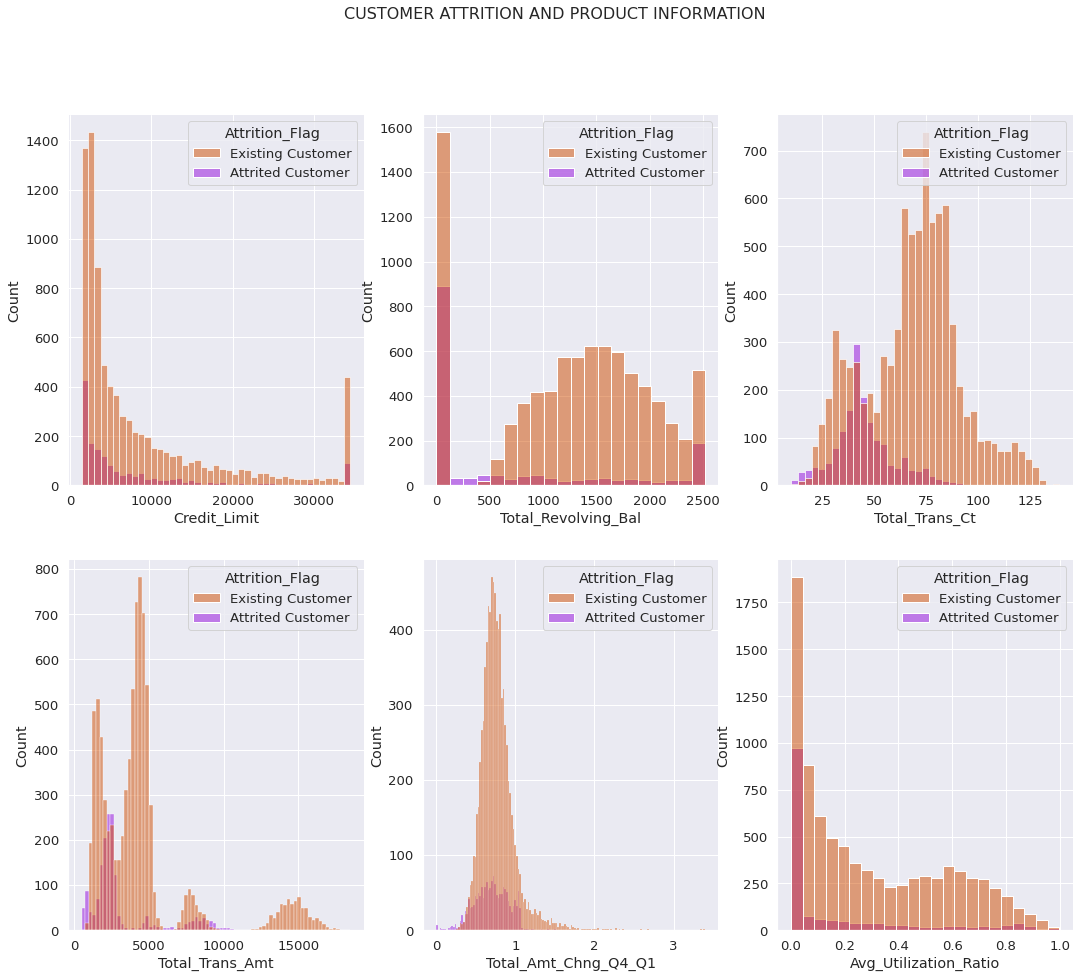

In [ ]:
#Viewing the influence Credit Limit, Total Revolving Balance, Total Trans Ct, 
#Total_Trans_Amt, Total_Amt_Chng_Q4_Q1 and Avg_Utilization_Ratio has on Customer Attrition:
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
fig.suptitle('CUSTOMER ATTRITION AND PRODUCT INFORMATION', fontsize = 16)
sns.histplot(ax=axes[0, 0], data =Credit, x='Credit_Limit',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 1], data=Credit, x='Total_Revolving_Bal',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 2], data=Credit, x='Total_Trans_Ct',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 0], data=Credit, x='Total_Trans_Amt',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 1], data =Credit, x='Total_Amt_Chng_Q4_Q1',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 2], data=Credit, x='Avg_Utilization_Ratio',hue='Attrition_Flag',palette='gnuplot_r')
sns.despine()

Observations:
- **Total Revolving Bal**: Customers that had a lower revolving balance were the most likely to leave the organization. This are Customers that owe less to the institution.

- **Total Trans Ct**:Customers who churn make fewer transactions using the bank's card than the customers that stay. This means that levels of inactivity are a contributing factor to churning.

- **Total Trans Amt**: Churning customers spend lesser than non churning customers therefore the lower the transaction amounts the higher the correlation with attrition.  
- **Avg Utilization Ratio**: the average card utilization ratio is higher for the existing customers.






 - Credit Limit by Gender

Text(0.5, 0, 'Credit Limit')

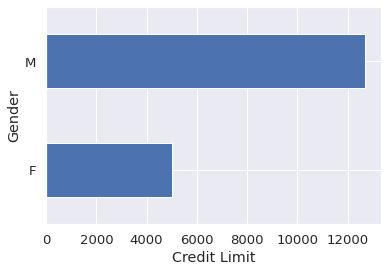

In [ ]:
# Checking the credit limit for each gender.
Credit.groupby('Gender')['Credit_Limit'].mean().plot(kind ='barh').set_xlabel(('Credit Limit'))

Text(0.5, 1.0, 'Income Category basing on gender')

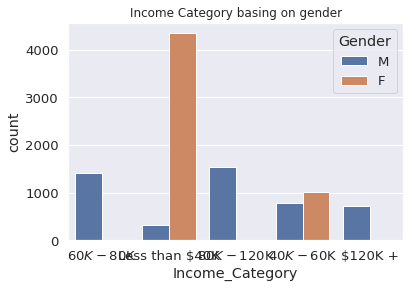

In [ ]:
#To understand the disparity based on income:
sns.countplot(x='Income_Category',hue='Gender',data=Credit)
sns.set(rc={'figure.figsize':(12, 4)})
plt.title("Income Category basing on gender")

Text(0.5, 1.0, 'Income Category basing on gender')

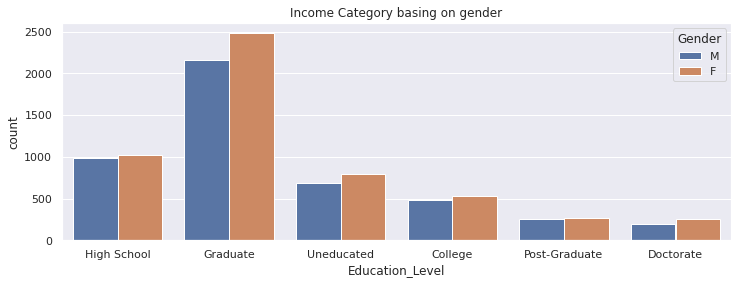

In [ ]:
#To understand disparity based on education:
sns.countplot(x='Education_Level',hue='Gender',data=Credit)
sns.set(rc={'figure.figsize':(12, 8)})
plt.title("Income Category basing on gender")

 - Correlation Test

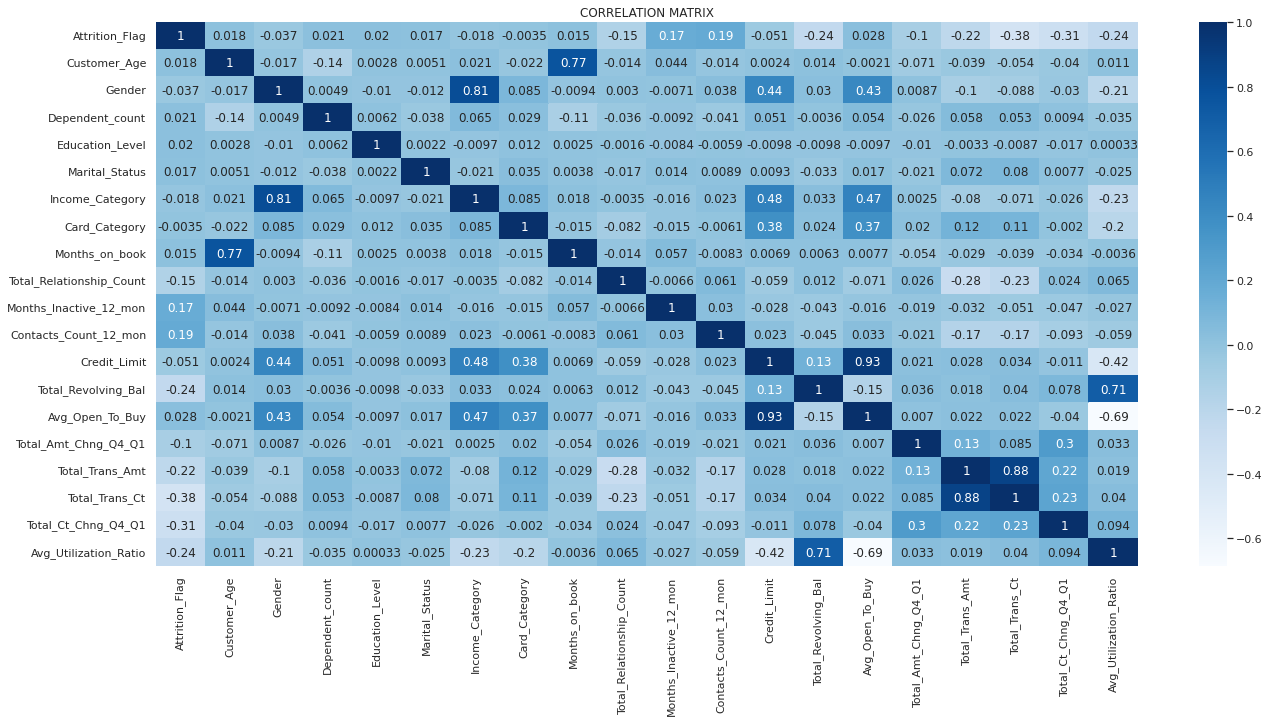

In [ ]:
#To check for correlation between the variables:
plt.figure(figsize = (22, 10))
Corr = Model.corr(method = 'spearman')
sns.heatmap(Corr, cmap = 'Blues', annot = True)
plt.title('CORRELATION MATRIX', y=1.5)
plt.show()


Summary:
- A perfect positive relationship exists between Average Open to Buy and Credit Limit.
- A strong positive relationship of 0.8 exists between Total Transaction Amount and Total Transaction Count.
- Customer Age and Months on Book have a positive relationship of 0.79
- A moderate positive relationship of 0.6 exists between Average Utilization Ratio and Total Revolving Balance.


Average open to buy is a forecasting tool and is used to budget the financial assets needed per client, it is based of how much a client regularly spends, while the credit limit is a metric relating to trustworthiness of the client's source of income.Both of these may have high correlation but both are significantly important and cannot be removed

**Conclusion**:

From the Bivariate analysis, it is clear that the product variables are the most influential when it comes to determining attrition 

# **MODELLING**

In [ ]:
#Creating the modelling dataframe:
Model = Credit.copy()
Model.head(4)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


**Feature Engineering**

Label Encoding

In [ ]:
#Encoding the Categorical Variables to a machine readable format:
#1. Ordinal and Binary Columns:
Model.replace({'Education_Level': {'Uneducated': 0, 'High School': 1, 'College':2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5},
               'Income_Category': {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4},
               'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
               'Gender': {'M': 1, 'F': 0}}, inplace = True)

#2. Nominal Columns:
Nominal = ['Marital_Status', 'Card_Category']

for i in Nominal:
  Model[i] = LabelEncoder().fit_transform(Model[i])

#Viewing the Dataset:
Model.head(4)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,2,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,1,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


**Multicollinearity**

Occurs when the model includes multiple factors that are correlated to each other.

In [ ]:
# Using the Variance Inflaction Factor to check for multicollinearity:

Independents = Model[['Customer_Age', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status',
                       'Income_Category', 'Card_Category','Months_on_book','Total_Relationship_Count', 
                       'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Credit_Limit',
                       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
                       'Total_Trans_Ct']]
  
# Creating the VIF dataframe:
vif_data = pd.DataFrame()
vif_data["feature"] = Independents.columns
  
#Calculating the VIF for each feature:
vif_data["VIF"] = [variance_inflation_factor(Independents.values, i)
                       for i in range(len(Independents.columns))]
vif_data.round(2)


,feature,VIF
0,Customer_Age,76.52
1,Gender,5.16
2,Dependent_count,4.10
3,Education_Level,3.58
4,Marital_Status,5.60
5,Income_Category,5.76
6,Card_Category,1.50
7,Months_on_book,56.44
8,Total_Relationship_Count,7.54
9,Months_Inactive_12_mon,6.12


VIF = 1 shows no correlation between the independent variable and the other variables.

VIF < 5 shows moderate correlation.

VIF > 5 indicate a high multicollinearity between the independent variables and others.

The inf(infinity) shows a perfect correlation between 2 independent variables. 

 - From the results above, multicolinearity is present. Algorithms likely to be affected are Logistic, KNN and Naive Bayes. Regularization during training shall be employed on some of the Models.

Feature Scaling

In [ ]:
#Performing scaling on the Independent variables:
sc = MinMaxScaler()
Feature_Sc = ['Customer_Age', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status',
                       'Income_Category', 'Card_Category','Months_on_book','Total_Relationship_Count', 
                       'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Credit_Limit',
                       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
                       'Total_Trans_Ct']

Model[Feature_Sc] = sc. fit_transform(Model[Feature_Sc])
Model.head(4)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,0.404255,1.0,0.6,0.2,0.5,0.50,0.0,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0,0.489362,0.0,1.0,0.6,1.0,0.00,0.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0,0.531915,1.0,0.6,0.6,0.5,0.75,0.0,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
3,0,0.297872,0.0,0.8,0.2,0.5,0.00,0.0,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761


# **Model Training**

For Comparison purposes, the models shall be trained on Imbalanced( No Sampling) and Oversampled data

**Oversampling**
 - This involves increasing the number of samples in the minority class to match up to the number of samples in the majority class.
 - This ensures the algorithm does not end up learning the majority class better and not understanding the minority class.
 - Performed on the training data so that no synthetic data is present on the validation dataset.

**Feature Selection**

[0.03211532 0.01636938 0.02600613 0.02334839 0.02015386 0.0196267
 0.00606001 0.03038791 0.07213772 0.03995411 0.04655835 0.03302017
 0.1077831  0.03321004 0.04957568 0.14045923 0.17623729 0.07516802
 0.05182859]


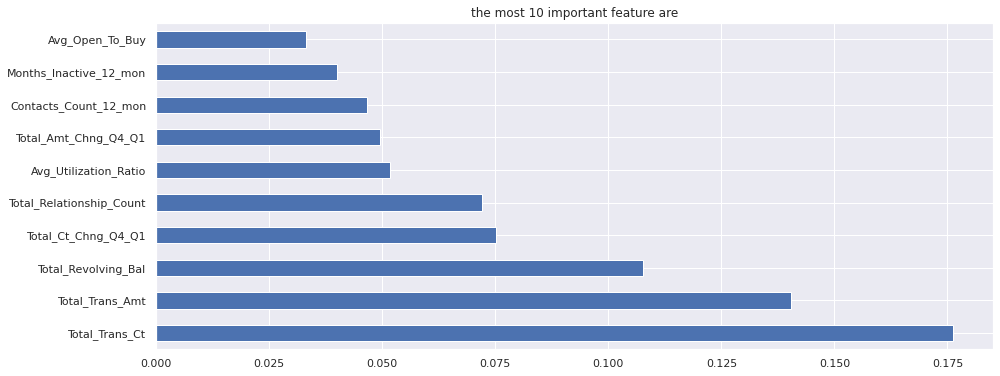

In [ ]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

X = Model.drop('Attrition_Flag', axis=1)
y = Model['Attrition_Flag']


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('the most 10 important feature are')
plt.show()

1. **Logistic Regression**

No Sampling

In [ ]:
#Separating the Features and Target:
X = Model[['Customer_Age','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 
           'Total_Revolving_Bal', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1',
           'Avg_Utilization_Ratio', 'Total_Trans_Ct']]
y = Model['Attrition_Flag']

#Splitting the data into training and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)


Building the Regression model

In [ ]:
#Model Selection without any hyperparameters:
Log = LogisticRegression()

#Fitting the model:
Log.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log.predict(X_test)


Performance Evaluation

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log.score(X_test, y_test):.2f}')


Train Accuracy: 0.90
Test Accuracy: 0.90


The Training and Test set accuracy are very much comparable.

Since the model is doing better on both the training and test set, there's no case of Overfitting

In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1714
           1       0.74      0.50      0.60       312

    accuracy                           0.90      2026
   macro avg       0.83      0.73      0.77      2026
weighted avg       0.89      0.90      0.89      2026

Precision Score:  0.74
Recall Score:  0.5
F1 Score:  0.6


In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)


array([[1660,   54],
       [ 157,  155]])

54 and 151  are the total misclassifications 

Hyperparameter Tuning

In [ ]:
#Choosing optimal parameters since the data is imbalanced:
model = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2'], 
               'C': np.logspace(0, 4, 5),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
               'max_iter' : [5, 10]
               }
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

# Fitting grid search
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [ ]:
#Checking the best hyperparameters:
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
print('Best Solver:', best_clf.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_clf.best_estimator_.get_params()['max_iter'])

Best Penalty: l1
Best C: 10.0
Best Solver: saga
Best max_iter: 5


In [ ]:
#Model Selection using the Above parameters:
model = LogisticRegression(penalty='l1', C=10.0, max_iter=5, solver='saga')

#Fitting the model:
model.fit(X_train,y_train )

#Predicting values based on the new parameters:
y_pred = model.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Log_Acc= accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {model.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {model.score(X_test, y_test):.2f}')


Train Accuracy: 0.90
Test Accuracy: 0.89


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Log_Pre = precision_score(y_test, y_pred)
Log_Rec = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1714
           1       0.71      0.53      0.61       312

    accuracy                           0.89      2026
   macro avg       0.82      0.75      0.77      2026
weighted avg       0.89      0.89      0.89      2026

Precision Score:  0.71
Recall Score:  0.53
F1 Score:  0.61


Oversampling

In [ ]:
#Using the SMOTE technique to increase samples of churned customers:
Smote = SMOTE(random_state = 42)
X_smote, y_smote = Smote.fit_resample(X_train, y_train)

In [ ]:
#Model Selection:
Log = LogisticRegression()

#Fitting the model:
Log.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = Log.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Log.score(X_test, y_test):.2f}')


Train Accuracy: 0.85
Test Accuracy: 0.83


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1714
           1       0.47      0.85      0.61       312

    accuracy                           0.83      2026
   macro avg       0.72      0.84      0.75      2026
weighted avg       0.89      0.83      0.85      2026

Precision Score:  0.47
Recall Score:  0.85
F1 Score:  0.61


Hyperparameter Tuning

In [ ]:
#Choosing optimal parameters:
model = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2'], 
               'C': np.logspace(0, 4, 5),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
               'max_iter' : [5, 10]
               }
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

# Fitting grid search
best_clf = clf.fit(X_smote, y_smote)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [ ]:
#Checking the best hyperparameters:
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
print('Best Solver:', best_clf.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_clf.best_estimator_.get_params()['max_iter'])

Best Penalty: l1
Best C: 1000.0
Best Solver: saga
Best max_iter: 5


In [ ]:
#Model Selection using the Best parameters:
model = LogisticRegression(penalty='l1', C=1000.0, max_iter=5, solver='saga')

#Fitting the model:
model.fit(X_smote, y_smote) 

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Log_Acc1 = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {model.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {model.score(X_test, y_test):.2f}')


Train Accuracy: 0.85
Test Accuracy: 0.83


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Log_Pre1 = precision_score(y_test, y_pred)
Log_Rec1 = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1714
           1       0.47      0.86      0.61       312

    accuracy                           0.83      2026
   macro avg       0.72      0.84      0.75      2026
weighted avg       0.89      0.83      0.85      2026

Precision Score:  0.47
Recall Score:  0.86
F1 Score:  0.61


The recall of the Attrited Customers with the imbalanced data after tuning was 57%. After performing oversampling, the recall improved to 86%.

This means that the model predicts 86% of the attrited customers accurately.

2. **DECISION TREES**

No Sampling

In [ ]:
#Model Selection:
Decision = DecisionTreeClassifier()

#Fitting the model:
Decision.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Decision.predict(X_test)


In [ ]:
#Checking the accuracy of the test and train models:
Dec_Acc= accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Decision.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Decision.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.94


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Dec_Pre = precision_score(y_test, y_pred)
Dec_Rec = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1714
           1       0.80      0.80      0.80       312

    accuracy                           0.94      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026

Precision Score:  0.8
Recall Score:  0.8
F1 Score:  0.8


Hyperparameter Tuning

In [ ]:
#Creating the parameter grid:
param_grid = {'max_depth': (10, 30, 50, 70, 90, 100),
              'criterion': ('gini', 'entropy'),
              'max_features': ('auto', 'sqrt', 'log2'),
              'min_samples_split': (2, 4, 6)}
              
#Using the decision tree classifier along with grid search:
Decision = DecisionTreeClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Decision, param_grid = param_grid, cv= 5,verbose = True )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

#To view the best parameters:
best_clf.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 4}

Fitting the Model

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Decision = DecisionTreeClassifier(criterion = 'entropy', max_depth = 30,
                               max_features = 'sqrt', min_samples_split = 4)

#Fitting the model:
Final_Decision.fit(X_train,y_train )

#Predicting values:
y_pred = Final_Decision.predict(X_test)


In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Final_Decision.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_Decision.score(X_test, y_test):.2f}')

Train Accuracy: 0.99
Test Accuracy: 0.92


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1714
           1       0.75      0.75      0.75       312

    accuracy                           0.92      2026
   macro avg       0.85      0.85      0.85      2026
weighted avg       0.92      0.92      0.92      2026

Precision Score:  0.75
Recall Score:  0.75
F1 Score:  0.75


The scores after tuning dropped. The model before tuning is preferrable

Oversampling

In [ ]:
#Model Selection:
Decision = DecisionTreeClassifier()

#Fitting the model:
Decision.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = Decision.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Dec_Acc1= accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Decision.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Decision.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.93


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Dec_Pre1 = precision_score(y_test, y_pred)
Dec_Rec1 = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1714
           1       0.74      0.84      0.79       312

    accuracy                           0.93      2026
   macro avg       0.86      0.89      0.87      2026
weighted avg       0.94      0.93      0.93      2026

Precision Score:  0.74
Recall Score:  0.84
F1 Score:  0.79


Plotting the Tree

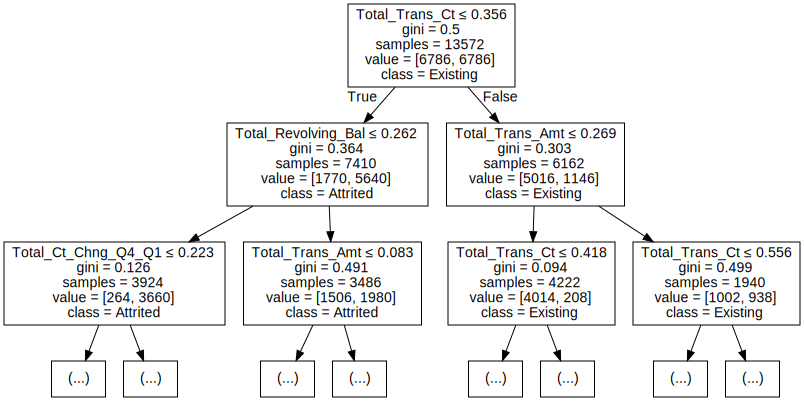

In [ ]:
#Decscribing the test features:
test_features = ['Customer_Age','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 
           'Total_Revolving_Bal', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1',
           'Avg_Utilization_Ratio', 'Total_Trans_Ct']

#Creating dot data:   
dot_data = export_graphviz(Decision, max_depth = 2,                                       #Limiting to a depth of 2 only
                           out_file = None, feature_names = test_features,                #Providing the independent variables
                           class_names = ['Existing', 'Attrited'],                        #Providing the dependent variables
                           filled = False, rounded = False, special_characters = True)    #Controlling the look of the nodes and coloring them                                           

#Displaying the graph                          
graph = graphviz.Source(dot_data)
graph

**Feature Importance**

In [ ]:
#Viewing the Important Features:
Best_Features = pd.DataFrame({'Features': X_train.columns, 'Importance':Decision.feature_importances_})

#Displaying the features:
Best_Features.sort_values('Importance', ascending = False).head(8)

,Features,Importance
11,Total_Trans_Ct,0.469443
8,Total_Trans_Amt,0.170823
4,Total_Revolving_Bal,0.092723
1,Total_Relationship_Count,0.069222
7,Total_Amt_Chng_Q4_Q1,0.052540
9,Total_Ct_Chng_Q4_Q1,0.052468
0,Customer_Age,0.021179
2,Months_Inactive_12_mon,0.018600


3. **RANDOM FOREST**

No Sampling

In [ ]:
#Initiating the random forest classifier:
Forest = RandomForestClassifier()

#Fitting the model:
Forest.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = Forest.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Ran_Acc= accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Forest.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Forest.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.96


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Ran_Pre = precision_score(y_test, y_pred)
Ran_Rec = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1714
           1       0.92      0.82      0.87       312

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Precision Score:  0.92
Recall Score:  0.82
F1 Score:  0.87


Hyperparameter Tuning

In [ ]:
#Choosing optimal parameters:

#Number of trees in the random forest:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
#The function to measure the quality of the split:
criterion= ['gini', 'entropy']
#Number of features to consider at every split:
max_features = ['auto', 'sqrt']
#Maximum number of leaves in the tree:
max_depth = [2, 4]
#Minimum number of samples required to split a node:
min_samples_split = [2, 5]
#Minimum number of samples required at each leaf node:
min_samples_leaf = [1, 2]
#Method of selecting samples for training each tree:
bootstrap = [True, False]


In [ ]:
#Creating the parameter grid:
param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

#Using the random forest classifier along with grid search:
Forest = RandomForestClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Forest, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

#To view the best parameters:
best_clf.best_params_


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 33}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Random = RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth =  4,
                               max_features = 'auto', min_samples_leaf = 2, min_samples_split = 5, n_estimators = 33)

#Fitting the model:
Final_Random.fit(X_train,y_train )

#Predicting values:
y_pred = Final_Random.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Final_Random.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_Random.score(X_test, y_test):.2f}')

Train Accuracy: 0.91
Test Accuracy: 0.91


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1714
           1       0.82      0.52      0.63       312

    accuracy                           0.91      2026
   macro avg       0.87      0.75      0.79      2026
weighted avg       0.90      0.91      0.90      2026

Precision Score:  0.82
Recall Score:  0.52
F1 Score:  0.63


Oversampling

In [ ]:
#Model Selection:
Forest1 = RandomForestClassifier()

#Fitting the model:
Forest1.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = Forest1.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Ran_Acc1 = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Forest1.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Forest1.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.96


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Ran_Pre1 = precision_score(y_test, y_pred)
Ran_Rec1 = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1714
           1       0.85      0.87      0.86       312

    accuracy                           0.96      2026
   macro avg       0.91      0.92      0.91      2026
weighted avg       0.96      0.96      0.96      2026

Precision Score:  0.85
Recall Score:  0.87
F1 Score:  0.86


Hyperparameter Tuning

In [ ]:
#Choosing  optimal parameters:

#Number of trees in the random forest:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
#The function to measure the quality of the split:
criterion= ['gini', 'entropy']
#Number of features to consider at every split:
max_features = ['auto', 'sqrt']
#Maximum number of leaves in the tree:
max_depth = [2, 4]
#Minimum number of samples required to split a node:
min_samples_split = [2, 5]
#Minimum number of samples required at each leaf node:
min_samples_leaf = [1, 2]
#Method of selecting samples for training each tree:
bootstrap = [True, False]

In [ ]:
#Creating the pameter grid:
param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [ ]:
#Using the random forest classifier along with grid search:
Forest2 = RandomForestClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Forest2, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2)

#Fitting the grid search:
best_clf = clf.fit(X_smote, y_smote)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

#To view the best parameters:
best_clf.best_params_

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 25}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Random = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth =  4,
                               max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 25)

#Fitting the model:
Final_Random.fit(X_smote,y_smote )

#Predicting values:
y_pred = Final_Random.predict(X_test)

In [ ]:
#Checking the Accuracy:
print(f'Train Accuracy: {Final_Random.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Final_Random.score(X_test, y_test):.2f}')


Train Accuracy: 0.91
Test Accuracy: 0.88


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      1714
           1       0.58      0.87      0.69       312

    accuracy                           0.88      2026
   macro avg       0.78      0.88      0.81      2026
weighted avg       0.91      0.88      0.89      2026

Precision Score:  0.58
Recall Score:  0.87
F1 Score:  0.69


Feature Importance

In [ ]:
#Viewing the Important Features:
Best_Features = pd.DataFrame({'Features': X_train.columns, 'Importance':Forest1.feature_importances_})

#Displaying the features:
Best_Features.sort_values('Importance', ascending = False).head(8)

,Features,Importance
11,Total_Trans_Ct,0.235452
8,Total_Trans_Amt,0.215229
4,Total_Revolving_Bal,0.108225
9,Total_Ct_Chng_Q4_Q1,0.098661
1,Total_Relationship_Count,0.058269
2,Months_Inactive_12_mon,0.057071
10,Avg_Utilization_Ratio,0.056609
7,Total_Amt_Chng_Q4_Q1,0.055247


4. **XGBOOST**

No Sampling

In [ ]:
#Model Selection:
Xgb = XGBClassifier()

#Fitting the model:
Xgb.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Xgb.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Xgb.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Xgb.score(X_test, y_test):.2f}')

Train Accuracy: 0.97
Test Accuracy: 0.96


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1714
           1       0.92      0.83      0.87       312

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Precision Score:  0.92
Recall Score:  0.83
F1 Score:  0.87


Hyperparameter Tuning

In [ ]:
#Choosing optimal parameters:
model = XGBClassifier()
param_grid = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

# Fitting grid search
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

#To view the best parameters:
best_clf.best_params_

{'learning_rate': 0.16,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 200}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Xgb = XGBClassifier(learning_rate = 0.16, min_child_weight = 3, max_depth =  10, n_estimators = 200)

#Fitting the model:
Final_Xgb.fit(X_train,y_train )

#Predicting values:
y_pred = Final_Xgb.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Xgb_Acc = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Final_Xgb.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_Xgb.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.97


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Xgb_Pre = precision_score(y_test, y_pred)
Xgb_Rec = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1714
           1       0.90      0.87      0.89       312

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.93      2026
weighted avg       0.97      0.97      0.97      2026

Precision Score:  0.9
Recall Score:  0.87
F1 Score:  0.89


Oversampling

In [ ]:
#Model Selection:
model = XGBClassifier()

#Fitting the model:
model.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = model.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {model.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {model.score(X_test, y_test):.2f}')

Train Accuracy: 0.97
Test Accuracy: 0.95


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1714
           1       0.78      0.90      0.84       312

    accuracy                           0.95      2026
   macro avg       0.88      0.93      0.90      2026
weighted avg       0.95      0.95      0.95      2026

Precision Score:  0.78
Recall Score:  0.9
F1 Score:  0.84


Hyperparameter Tuning

In [ ]:
#Choosing optimal parameters:
model = XGBClassifier()
param_grid = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

# Fitting grid search
best_clf = clf.fit(X_smote, y_smote)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

#To view the best parameters:
best_clf.best_params_

{'learning_rate': 0.16,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 200}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Xgb = XGBClassifier(learning_rate = 0.16, min_child_weight = 1, max_depth =  10, n_estimators = 200)

#Fitting the model:
Final_Xgb.fit(X_smote,y_smote )

#Predicting values:
y_pred = Final_Xgb.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Xgb_Acc1 = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Final_Xgb.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Final_Xgb.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.96


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Xgb_Pre1 = precision_score(y_test, y_pred)
Xgb_Rec1 = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1714
           1       0.85      0.88      0.87       312

    accuracy                           0.96      2026
   macro avg       0.91      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Precision Score:  0.85
Recall Score:  0.88
F1 Score:  0.87


5. **LIGHTGBM**

No Sampling

In [ ]:
#Model Selection:
Lgb = lgb.LGBMClassifier()

#Fitting the model:
Lgb.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Lgb.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Lgb.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Lgb.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.97


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1714
           1       0.91      0.88      0.90       312

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Precision Score:  0.91
Recall Score:  0.88
F1 Score:  0.9


Hyperparameter Tuning

In [ ]:
#Choosing optimal parameters:
model = lgb.LGBMClassifier()
param_grid = [{"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]}
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

# Fitting grid search
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [ ]:
#To view the best parameters:
best_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 200, 'num_leaves': 300}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_lgb = lgb.LGBMClassifier(learning_rate = 0.1, num_leaves = 300, max_depth =  25, n_estimators = 200)

#Fitting the model:
Final_lgb.fit(X_train,y_train )

#Predicting values:
y_pred = Final_lgb.predict(X_test)

In [ ]:
#Checking the Accuracy:
Lgb_Acc= accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Final_lgb.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_lgb.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.97


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Lgb_Pre = precision_score(y_test, y_pred)
Lgb_Rec = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1714
           1       0.92      0.88      0.90       312

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Precision Score:  0.92
Recall Score:  0.88
F1 Score:  0.9


Oversampling

In [ ]:
#Model Selection:
Lgb = lgb.LGBMClassifier()

#Fitting the model:
Lgb.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = Lgb.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Lgb.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Lgb.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.96


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1714
           1       0.87      0.91      0.89       312

    accuracy                           0.96      2026
   macro avg       0.93      0.94      0.93      2026
weighted avg       0.97      0.96      0.96      2026

Precision Score:  0.87
Recall Score:  0.91
F1 Score:  0.89


Hyperparameter Tuning

In [ ]:
#Choosing optimal parameters:
model = lgb.LGBMClassifier()
param_grid = [{"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]}
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

# Fitting grid search
best_clf = clf.fit(X_smote, y_smote)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

#To view the best parameters:
best_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 200, 'num_leaves': 900}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_lgb1 = lgb.LGBMClassifier(learning_rate = 0.1, num_leaves = 900, max_depth =  50, n_estimators = 200)

#Fitting the model:
Final_lgb1.fit(X_smote,y_smote )

#Predicting values:
y_pred = Final_lgb1.predict(X_test)

In [ ]:
#Checking the Accuracy:
Lgb_Acc1= accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Final_lgb1.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Final_lgb1.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.96


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Lgb_Pre1 = precision_score(y_test, y_pred)
Lgb_Rec1 = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1714
           1       0.87      0.90      0.88       312

    accuracy                           0.96      2026
   macro avg       0.93      0.94      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Precision Score:  0.87
Recall Score:  0.9
F1 Score:  0.88


6. **SUPPORT VECTOR MACHINE**

No Sampling

In [ ]:
#Model Selection:
SVC = SVC()

#Fitting the model:
SVC.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = SVC.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Svc_Acc = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {SVC.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {SVC.score(X_test, y_test):.2f}')

Train Accuracy: 0.93
Test Accuracy: 0.93


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Svc_Pre = precision_score(y_test, y_pred)
Svc_Rec = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1714
           1       0.86      0.64      0.74       312

    accuracy                           0.93      2026
   macro avg       0.90      0.81      0.85      2026
weighted avg       0.93      0.93      0.92      2026

Precision Score:  0.86
Recall Score:  0.64
F1 Score:  0.74


Oversampling

In [ ]:
from sklearn.svm import SVC 
#Model Selection:
SVC_1 = SVC()

#Fitting the model:
SVC_1.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = SVC_1.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Svc_Acc1 = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {SVC_1.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {SVC_1.score(X_test, y_test):.2f}')

Train Accuracy: 0.94
Test Accuracy: 0.90


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Svc_Pre1 = precision_score(y_test, y_pred)
Svc_Rec1 = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1714
           1       0.64      0.88      0.74       312

    accuracy                           0.90      2026
   macro avg       0.81      0.89      0.84      2026
weighted avg       0.92      0.90      0.91      2026

Precision Score:  0.64
Recall Score:  0.88
F1 Score:  0.74


Hyperparameter Tuning

In [ ]:
#Choosing optimal parameters:
param_grid = {'C': [ 1, 10, 100, 1000],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']}
Svc_2 = SVC()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Svc_2, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2)

#Fitting the grid search:
best_clf = clf.fit(X_smote, y_smote)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

#To view the best parameters:
best_clf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

Fitting the Final Model

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final = SVC(C = 1000, gamma = 0.1, kernel = 'rbf')

#Fitting the model:
Final.fit(X_smote,y_smote )

#Predicting values:
y_predFinal = Final.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Final.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Final.score(X_test, y_test):.2f}')

Train Accuracy: 0.94
Test Accuracy: 0.90


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_predFinal))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_predFinal).round(2))
print('Recall Score: ', recall_score(y_test, y_predFinal).round(2))
print('F1 Score: ', f1_score(y_test, y_predFinal).round(2))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1714
           1       0.64      0.87      0.74       312

    accuracy                           0.90      2026
   macro avg       0.81      0.89      0.84      2026
weighted avg       0.92      0.90      0.91      2026

Precision Score:  0.64
Recall Score:  0.87
F1 Score:  0.74


7. **KNN**

No sampling

In [ ]:
#Model Selection :
Knn = KNeighborsClassifier(n_neighbors=1)

#Fitting the model:
Knn.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Knn.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Knn.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Knn.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.91


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1714
           1       0.72      0.65      0.68       312

    accuracy                           0.91      2026
   macro avg       0.83      0.80      0.81      2026
weighted avg       0.90      0.91      0.91      2026

Precision Score:  0.72
Recall Score:  0.65
F1 Score:  0.68


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))


[[1635   79]
 [ 109  203]]


**Hyperparameter Tuning**

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_knn = KNeighborsClassifier(algorithm = 'auto', metric = 'manhattan',
                               n_neighbors = 3, p = 1, weights = 'distance')
#Fitting the model:
Final_knn.fit(X_train,y_train )

#Predicting values:
Y_pred = Final_knn.predict(X_test)

In [ ]:
#Checking the Accuracy:
Knn_Acc = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Final_knn.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_knn.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.92


In [ ]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
Knn_Pre = precision_score(y_test, y_pred)
Knn_Rec = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', recall_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1714
           1       0.81      0.63      0.71       312

    accuracy                           0.92      2026
   macro avg       0.87      0.80      0.83      2026
weighted avg       0.92      0.92      0.92      2026

Precision Score:  0.81
Recall Score:  0.63
F1 Score:  0.71


Oversampling

In [ ]:
#Model Selection:
Knn1 = KNeighborsClassifier(n_neighbors=1)

#Fitting the model:
Knn1.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = Knn1.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Knn1.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Knn1.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.90


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1714
           1       0.65      0.71      0.68       312

    accuracy                           0.90      2026
   macro avg       0.80      0.82      0.81      2026
weighted avg       0.90      0.90      0.90      2026

Precision Score:  0.65
Recall Score:  0.71
F1 Score:  0.68


Hyperparameter Optimization

In [ ]:
#Creating the parameter grid:
param_grid = {'n_neighbors' : [3, 5, 7, 9, 10, 15, 20, 21],
              'weights' : ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute'],
              'p' : [1,2]}


In [ ]:
#Using the classifier along with grid search:
knn = KNeighborsClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(knn, param_grid = param_grid, cv= 10, verbose = True, n_jobs = 1, scoring = 'accuracy' )

#Fitting the grid search:
best_clf = clf.fit(X_smote, y_smote)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)


Fitting 10 folds for each of 384 candidates, totalling 3840 fits


In [ ]:
#To view the best parameters:
best_clf.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

Building the Model with the best estimators

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_knn = KNeighborsClassifier(algorithm = 'auto', metric = 'manhattan',
                               n_neighbors = 3, p = 1, weights = 'distance')
#Fitting the model:
Final_knn.fit(X_smote,y_smote )

#Predicting values:
Y_pred = Final_knn.predict(X_test)

Performance Evaluation

In [ ]:
#Checking the Accuracy:
Knn_Acc1 = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Final_knn.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Final_knn.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.89


In [ ]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
Knn_Pre1 = precision_score(y_test, y_pred)
Knn_Rec1 = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', recall_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1714
           1       0.61      0.77      0.68       312

    accuracy                           0.89      2026
   macro avg       0.78      0.84      0.80      2026
weighted avg       0.90      0.89      0.89      2026

Precision Score:  0.61
Recall Score:  0.77
F1 Score:  0.68


8. **NAIVE BAYES**

No Sampling

In [ ]:
#Model Selection:
Nom = GaussianNB()

#Fitting the model:
Nom.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Nom.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Naive_Acc = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Nom.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Nom.score(X_test, y_test):.2f}')

Train Accuracy: 0.89
Test Accuracy: 0.88


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Naive_Pre = precision_score(y_test, y_pred)
Naive_Rec = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1714
           1       0.61      0.62      0.61       312

    accuracy                           0.88      2026
   macro avg       0.77      0.77      0.77      2026
weighted avg       0.88      0.88      0.88      2026

Precision Score:  0.61
Recall Score:  0.62
F1 Score:  0.61


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[1590  124]
 [ 119  193]]


Oversampling

In [ ]:
#Model Selection:
Nom1 = GaussianNB()

#Fitting the model:
Nom1.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = Nom1.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Naive_Acc1 = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Nom1.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Nom1.score(X_test, y_test):.2f}')

Train Accuracy: 0.81
Test Accuracy: 0.78


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Naive_Pre1 = precision_score(y_test, y_pred)
Naive_Rec1 = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1714
           1       0.40      0.81      0.53       312

    accuracy                           0.78      2026
   macro avg       0.68      0.79      0.70      2026
weighted avg       0.87      0.78      0.81      2026

Precision Score:  0.4
Recall Score:  0.81
F1 Score:  0.53


The Scaling caters for tuning

**NEURAL NETWORKS**

No Sampling

In [ ]:
#Model Selection:
Mlp = MLPClassifier()

#Fitting the model:
Mlp.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Mlp.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Mlp.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Mlp.score(X_test, y_test):.2f}')

Train Accuracy: 0.95
Test Accuracy: 0.94


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1714
           1       0.85      0.75      0.80       312

    accuracy                           0.94      2026
   macro avg       0.90      0.86      0.88      2026
weighted avg       0.94      0.94      0.94      2026

Precision Score:  0.85
Recall Score:  0.75
F1 Score:  0.8


Hyperparameter Tuning

In [ ]:
#Using the best parameters from hyperparameter tuning:
Mlp1 = MLPClassifier(activation = 'tanh', alpha =  0.05, hidden_layer_sizes = (10,10),
                               learning_rate = 'adaptive', solver = 'lbfgs')

#Fitting the model:
Mlp1.fit(X_train,y_train )

#Predicting values:
y_pred = Mlp1.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Mlp_Acc = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Mlp1.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Mlp1.score(X_test, y_test):.2f}')

Train Accuracy: 0.96
Test Accuracy: 0.95


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Mlp_Pre = precision_score(y_test, y_pred)
Mlp_Rec = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1714
           1       0.86      0.82      0.84       312

    accuracy                           0.95      2026
   macro avg       0.91      0.90      0.90      2026
weighted avg       0.95      0.95      0.95      2026

Precision Score:  0.86
Recall Score:  0.82
F1 Score:  0.84


Oversampling

In [ ]:
#Model Selection:
Mlp_1 = MLPClassifier()

#Fitting the model:
Mlp_1.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = Mlp_1.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Mlp_1.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Mlp_1.score(X_test, y_test):.2f}')


Train Accuracy: 0.94
Test Accuracy: 0.91


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1714
           1       0.66      0.87      0.75       312

    accuracy                           0.91      2026
   macro avg       0.82      0.89      0.85      2026
weighted avg       0.93      0.91      0.92      2026

Precision Score:  0.66
Recall Score:  0.87
F1 Score:  0.75


Hyperparameter Tuning

In [ ]:
#Creating the parameter grid:
param_grid = {'hidden_layer_sizes': [(5,5,5), (5,1), (5,5)],
          'activation': ['relu','tanh','logistic', 'identity'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'sgd', 'lbfgs']}

In [ ]:
#Using the classifier along with grid search:
mlp3=MLPClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(mlp3, param_grid = param_grid, cv= 5, verbose = 0, scoring = 'neg_mean_squared_error' )

#Fitting the grid search:
best_clf = clf.fit(X_smote, y_smote)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

#To view the best parameters:
best_clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (5, 5, 5),
 'learning_rate': 'adaptive',
 'solver': 'lbfgs'}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final = MLPClassifier(activation = 'tanh', alpha =  0.0001, hidden_layer_sizes = (5, 5, 5),
                               learning_rate = 'adaptive', solver = 'lbfgs')

#Fitting the model:
Final.fit(X_smote,y_smote )

#Predicting values:
y_pred = Final.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
Mlp_Acc1 = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {Final.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Final.score(X_test, y_test):.2f}')

Train Accuracy: 0.96
Test Accuracy: 0.95


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
Mlp_Pre1 = precision_score(y_test, y_pred)
Mlp_Rec1 = recall_score(y_test, y_pred)
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', recall_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1714
           1       0.78      0.93      0.85       312

    accuracy                           0.95      2026
   macro avg       0.88      0.94      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Precision Score:  0.78
Recall Score:  0.93
F1 Score:  0.85


# **Performance Analysis**

**Precision**: Gives the ratio of true positives against all positives. In this case, a positive will be the customers leaving the organization.

**Recall**: A measure  of the model correctly identifying True Positives( customers leaving the organization). The recall is basically the ratio of how many customers did our model predict correctly from the total customers within the institution.

Improving the recall score should be the main focus since that kind of error will affect the business more than the precision.



Assessing the scores with:

**No Sampling**

In [ ]:
#Model Comparison:
Models =  pd.DataFrame({'Model': ['Logistic Regression', 'Decison Trees', 'Random Forest', 'XGBoost', 'LightGBM',
                                  'Support Vector Machine', 'KNN','Naive Bayes', 'Neural Networks'],
                     'Accuracy Score': [Log_Acc*100, Dec_Acc*100, Ran_Acc*100, Xgb_Acc*100, Lgb_Acc*100, Svc_Acc*100, 
                                        Knn_Acc*100, Naive_Acc*100, Mlp_Acc*100],
                     'Precison Score': [Log_Pre*100, Dec_Pre*100, Ran_Pre*100, Xgb_Pre*100, Lgb_Pre*100, Svc_Pre*100,
                                        Knn_Pre*100, Naive_Pre*100, Mlp_Pre*100],
                     'Recall Score': [Log_Rec*100, Dec_Rec*100, Ran_Rec*100, Xgb_Rec*100, Lgb_Rec*100, Svc_Rec*100,
                                        Knn_Rec*100, Naive_Rec*100, Mlp_Rec*100]})

Models.sort_values(by = 'Recall Score', ascending = False).round(0)

,Model,Accuracy Score,Precison Score,Recall Score
4,LightGBM,97.0,92.0,88.0
3,XGBoost,97.0,90.0,87.0
2,Random Forest,96.0,92.0,82.0
8,Neural Networks,95.0,86.0,82.0
1,Decison Trees,94.0,80.0,80.0
6,KNN,91.0,72.0,65.0
5,Support Vector Machine,93.0,86.0,64.0
7,Naive Bayes,88.0,61.0,62.0
0,Logistic Regression,89.0,71.0,53.0


**Oversampling**

In [ ]:
#Model Comparison:
Models =  pd.DataFrame({'Model': ['Logistic Regression', 'Decison Trees', 'Random Forest', 'XGBoost', 'LightGBM',
                                  'Support Vector Machine', 'KNN','Naive Bayes', 'Neural Networks'],
                     'Accuracy Score': [Log_Acc1*100, Dec_Acc1*100, Ran_Acc1*100, Xgb_Acc1*100, Lgb_Acc1*100, Svc_Acc1*100,
                                        Knn_Acc1*100, Naive_Acc1*100, Mlp_Acc1*100],
                     'Precison Score': [Log_Pre1*100,Dec_Pre1*100, Ran_Pre1*100, Xgb_Pre1*100, Lgb_Pre1*100, Svc_Pre1*100,
                                        Knn_Pre1*100, Naive_Pre1*100, Mlp_Pre1*100,],
                     'Recall Score': [Log_Rec1*100, Dec_Rec1*100, Ran_Rec1*100, Xgb_Rec1*100, Lgb_Rec1*100, Svc_Rec1*100, 
                                        Knn_Rec1*100, Naive_Rec1*100, Mlp_Rec1*100]})

Models.sort_values(by = 'Accuracy Score', ascending = False).round(0)

,Model,Accuracy Score,Precison Score,Recall Score
4,LightGBM,96.0,87.0,90.0
3,XGBoost,96.0,85.0,88.0
2,Random Forest,96.0,85.0,87.0
8,Neural Networks,95.0,78.0,93.0
1,Decison Trees,93.0,74.0,84.0
5,Support Vector Machine,90.0,64.0,88.0
6,KNN,89.0,61.0,77.0
0,Logistic Regression,83.0,47.0,86.0
7,Naive Bayes,78.0,40.0,81.0


**Conclusion**

1. The best model to use is the **LightGBM** model

**Feature Importance**

This helps us understand what factors drive the model to make certain predictions. 

In [ ]:
#Viewing the Important Features:
Best_Features = pd.DataFrame({'Features': X_train.columns, 'Importance':Final_lgb1.feature_importances_})

#Displaying the features:
Best_Features.sort_values('Importance', ascending = False).head(10)

,Features,Importance
8,Total_Trans_Amt,14167
11,Total_Trans_Ct,11984
7,Total_Amt_Chng_Q4_Q1,11857
9,Total_Ct_Chng_Q4_Q1,11578
0,Customer_Age,8781
4,Total_Revolving_Bal,8125
5,Credit_Limit,7678
1,Total_Relationship_Count,4904
3,Contacts_Count_12_mon,4347
2,Months_Inactive_12_mon,3934


2. Confirming the conclusions on Bivariate analysis, the Product variables give more importance in determining whether or not a customer churns.

The factors that make the model determine whether a customer will churn include, Total transaction amount, Total transaction count, Total revolving balance and Total amount Change Q4_Q1


 **Recommendations**

There were two main objectives of the analysis. First, analyze factors that increase customer churning and develop a churn prediction model that assists the business  to predict customers who are most likely to churn.
From the analysis:
- The Bank can take insight from the Exploratory analysis to understand which customers are at risk of churning.
- The LighGBM Algorithm can be used to accurately predict customers that are likely to churn.
- Focusing on lower income group: Since most of the customers are from the lower income group, implementing promotions to benefit the lower group is a good alternative.


